In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn import metrics



In [5]:
correct , pred = [], []
cnts = {}
types = ['anagram','hidden word', 'assemblage',  'container', 'double definition']
with open("results/included_results/llama_wordplay_130.txt") as f:
    for line in f:
        if '|' not in line:
            continue
        line = line.strip().split("|")
        c = line[1]
        p = line[2]

        c = re.findall("'([^']*)'", c)[0]
        
        assert c in types
        cnts[c] = cnts.get(c,0) + 1
        correct.append(c)

        p = p.split('Response: ')[1].strip()
        assert p in types
        pred.append(p)



In [6]:
cnts

{'anagram': 25,
 'assemblage': 32,
 'container': 25,
 'double definition': 27,
 'hidden word': 21}

In [7]:
for x in set(pred):
    print(x, pred.count(x))

hidden word 128
container 2


In [9]:
metrics.confusion_matrix(correct, pred, labels=types)

array([[ 0, 24,  0,  1,  0],
       [ 0, 21,  0,  0,  0],
       [ 0, 32,  0,  0,  0],
       [ 0, 24,  0,  1,  0],
       [ 0, 27,  0,  0,  0]])

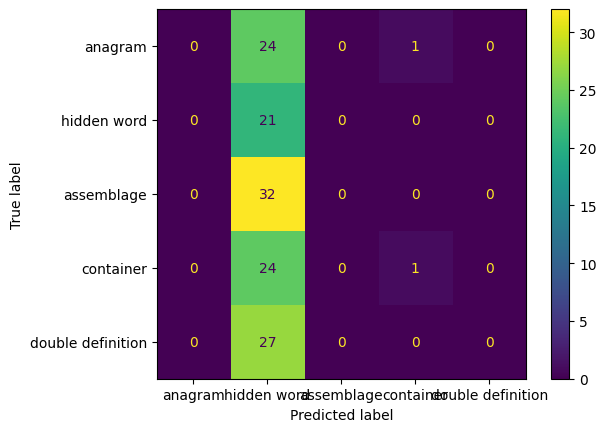

In [10]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(correct, pred, labels=types), display_labels=types).plot()